In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import optuna
import os
import pytorch_lightning as pl
import yaml

from Data.Drosophilla.FlyDataMod import FlyDataModule
from IPython.core.debugger import set_trace
from Models import BiLSTM as bi
from torch import nn as nn
from Utils import callbacks as cb
from Utils import evaluations as ev
from Utils import HyperParams as hp
from Utils import loggers as lg

np.random.seed(0)

In [2]:
def runBiLSTM_Exp(
    trial,
    label_type,
    label_val,
    lr,
    batch_size,
    num_layers,
    hidden_size,
    dropout,
    bias):
    logger = lg.DictLogger(trial.number,
                          root_dir)
    trainer = pl.Trainer(
        gpus=1,
        logger=logger,
        max_epochs=50,
        callbacks=[cb.getcb()],
        default_root_dir=root_dir)
    
    dm = FlyDataModule(cell_line="S2",
                     data_win_radius=5,
                     batch_size=batch_size,
                     label_type=label_type,
                     label_val=label_val)
    dm.setup()
    
    hparams = {'cell_line':"S2",
              "data_win_radius":5,
              "label_type":label_type,
              "batch_size":batch_size}
    
    model_bilstm = bi.BiLSTMModule(
                    input_size=29,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    dropout=dropout,
                    bias=bias,
                    lr=lr,
                    hparams=hparams
                )
    model_bilstm.cuda()
    
    trainer.fit(model_bilstm, dm)
    score = logger.metrics[-1]['val weighted mse loss']
    if np.isnan(score):
        score = 99999999
    return score

def objective(trial):
    lr          = trial.suggest_categorical("lr", [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    batch_size  = trial.suggest_categorical("batch_size", [1,4,16,64])
    num_layers  = trial.suggest_categorical("num_layers", [1,2,3,4,5,6])
    hidden_size = trial.suggest_categorical("hidden_size", [64])
    dropout     = trial.suggest_categorical("dropout", [0, 0.1, 0.2, 0.3])
    bias        = trial.suggest_categorical("bias", [True, False])
    print(lr, batch_size, num_layers, hidden_size, dropout, bias)
    return runBiLSTM_Exp(
        trial=trial,
        label_type=label_type,
        label_val=label_val,
        lr=lr,
        batch_size=batch_size,
        num_layers=num_layers,
        hidden_size=hidden_size,
        dropout=dropout,
        bias=bias)
    

In [3]:
label_type = "directionality"
label_val  = 10
root_dir   = "Experiments/Table_9_LSTM_Tunning_Directionality"
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
hp.save_hyperparams(root_dir,
                   study.best_trial.number)

[I 2021-04-24 19:40:31,810] A new study created in memory with name: no-name-42652f57-6c86-41bd-a9c8-a85d9d184526


0.0001 64 5 64 0.1 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 22.1 K
------------------------------
22.1 K    Trainable params
0         Non-trainable params
22.1 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:42:07,313] Trial 0 finished with value: -57118.14453125 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 5, 'hidden_size': 64, 'dropout': 0.1, 'bias': False}. Best is trial 0 with value: -57118.14453125.


0.01 16 3 64 0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:42:40,915] Trial 1 finished with value: -302977.125 and parameters: {'lr': 0.01, 'batch_size': 16, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0, 'bias': True}. Best is trial 1 with value: -302977.125.


0.01 64 1 64 0.2 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 15.5 K
------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:42:58,796] Trial 2 finished with value: -383811.3125 and parameters: {'lr': 0.01, 'batch_size': 64, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0.2, 'bias': False}. Best is trial 2 with value: -383811.3125.


0.1 16 6 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:43:29,283] Trial 3 finished with value: -425774.71875 and parameters: {'lr': 0.1, 'batch_size': 16, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 3 with value: -425774.71875.


0.001 16 3 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:47:24,234] Trial 4 finished with value: -425271.5 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 3 with value: -425774.71875.


0.001 16 4 64 0.2 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 20.5 K
------------------------------
20.5 K    Trainable params
0         Non-trainable params
20.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:51:32,961] Trial 5 finished with value: -423043.40625 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.2, 'bias': False}. Best is trial 3 with value: -425774.71875.


0.1 4 4 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:53:13,827] Trial 6 finished with value: -299397.25 and parameters: {'lr': 0.1, 'batch_size': 4, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 3 with value: -425774.71875.


0.01 4 6 64 0.3 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 23.8 K
------------------------------
23.8 K    Trainable params
0         Non-trainable params
23.8 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 19:56:46,097] Trial 7 finished with value: -422066.875 and parameters: {'lr': 0.01, 'batch_size': 4, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.3, 'bias': False}. Best is trial 3 with value: -425774.71875.


0.0001 4 3 64 0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:11:43,075] Trial 8 finished with value: -304647.125 and parameters: {'lr': 0.0001, 'batch_size': 4, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0, 'bias': True}. Best is trial 3 with value: -425774.71875.


0.0001 16 4 64 0.1 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 20.5 K
------------------------------
20.5 K    Trainable params
0         Non-trainable params
20.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:17:11,320] Trial 9 finished with value: -138592.015625 and parameters: {'lr': 0.0001, 'batch_size': 16, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.1, 'bias': False}. Best is trial 3 with value: -425774.71875.


1e-05 1 6 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 21:48:49,313] Trial 10 finished with value: -165015.4375 and parameters: {'lr': 1e-05, 'batch_size': 1, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 3 with value: -425774.71875.


0.001 16 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 21:52:19,523] Trial 11 finished with value: -763456.125 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 11 with value: -763456.125.


0.1 16 2 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 21:52:52,219] Trial 12 finished with value: -398503.625 and parameters: {'lr': 0.1, 'batch_size': 16, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 11 with value: -763456.125.


0.1 1 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 21:59:18,787] Trial 13 finished with value: -439760.96875 and parameters: {'lr': 0.1, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 11 with value: -763456.125.


0.001 1 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 22:35:49,408] Trial 14 finished with value: -17018890.0 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 14 with value: -17018890.0.


0.001 1 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 23:17:13,169] Trial 15 finished with value: -65506072.0 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 15 with value: -65506072.0.


0.001 1 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 23:59:50,103] Trial 16 finished with value: -21351618.0 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 15 with value: -65506072.0.


0.001 1 2 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 19.2 K
------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:40:03,604] Trial 17 finished with value: -9537607.0 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 15 with value: -65506072.0.


0.001 1 1 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 16.5 K
------------------------------
16.5 K    Trainable params
0         Non-trainable params
16.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:58:32,261] Trial 18 finished with value: -1470914.75 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 15 with value: -65506072.0.


1e-05 1 5 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_9_LSTM_Tunning_Directionality



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 27.3 K
------------------------------
27.3 K    Trainable params
0         Non-trainable params
27.3 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 02:09:46,735] Trial 19 finished with value: -164425.734375 and parameters: {'lr': 1e-05, 'batch_size': 1, 'num_layers': 5, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 15 with value: -65506072.0.


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


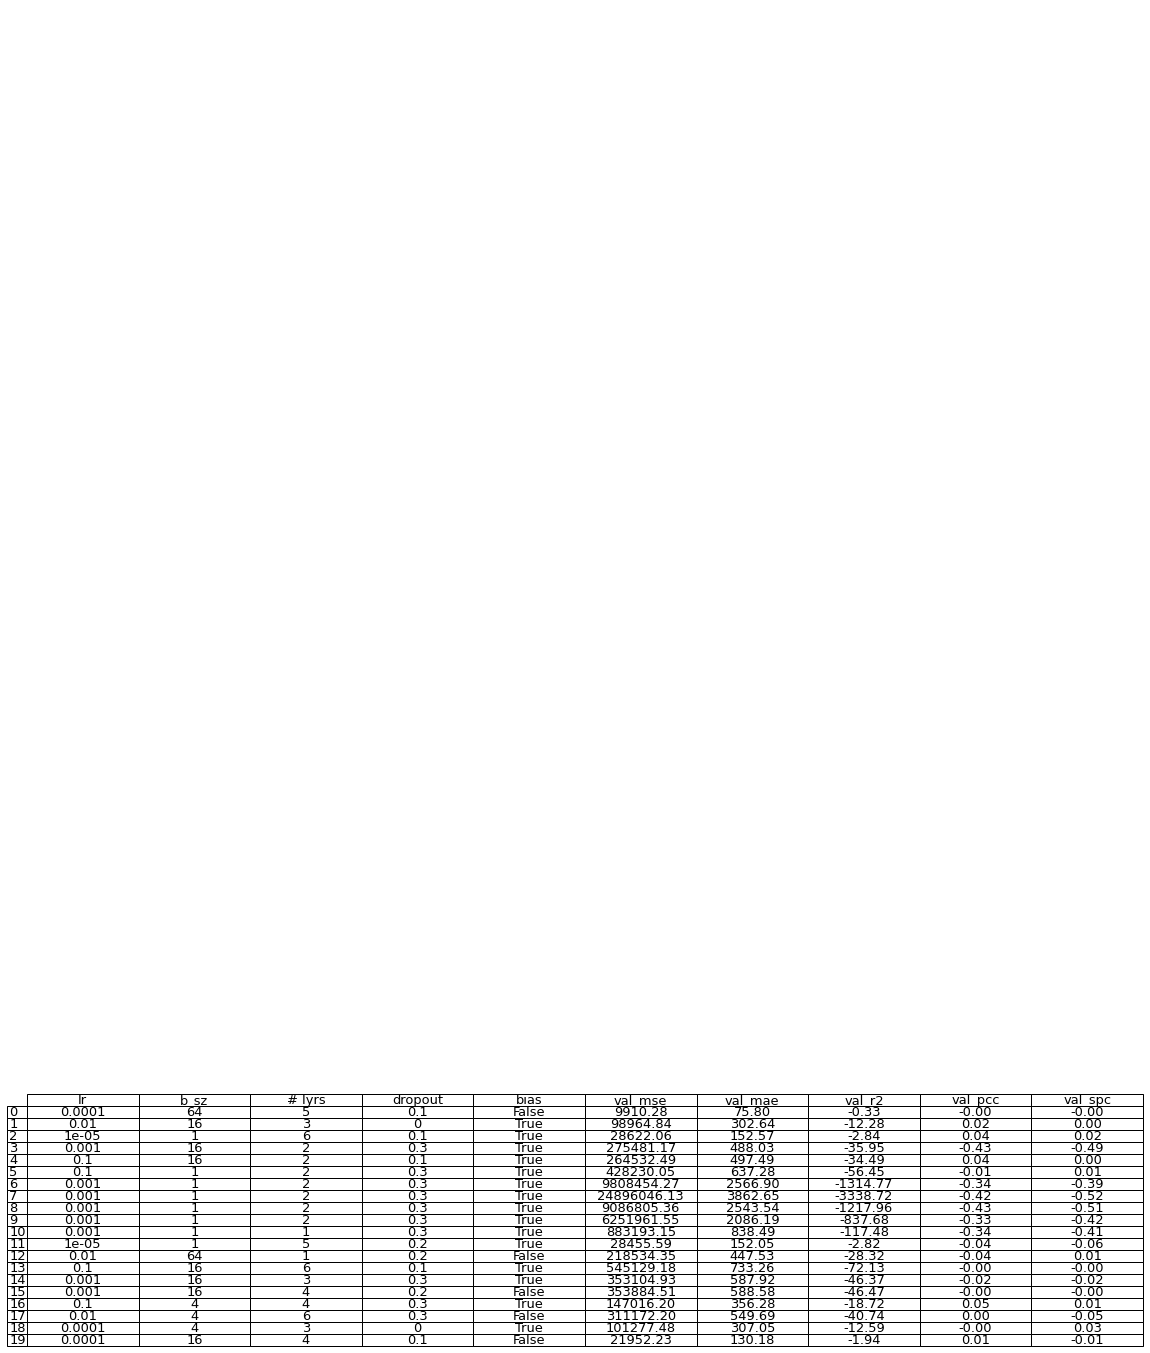

In [4]:
#display table 9
root_dir   = "Experiments/Table_9_LSTM_Tunning_Directionality"
label_type = "directionality"
label_val  = 10
dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
dm.setup()
vals = []

exps = sorted(glob.glob(root_dir+"/optuna/*"))
for e, exp in enumerate(exps):
    layer_weights = glob.glob(exp+"/checkpoints/*")[0]
    hparams       = yaml.full_load(open(glob.glob(exp+"/hparams.yaml")[0], 'r'))
    model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
    row           = []
    row.append(hparams['lr'])
    row.append(hparams['hparams']['batch_size'])
    row.append(hparams['num_layers'])
    row.append(hparams['dropout'])
    row.append(hparams['bias'])
    mm            = ev.getModelMetrics(model, dm, 'val').values()
    fmm           = list(map(lambda x: "{:.2f}".format(x), mm ))
    row.extend(fmm)
    vals.append(row)
cols = ['lr','b_sz', '# lyrs', 'dropout','bias','val_mse','val_mae','val_r2','val_pcc','val_spc']
fig, ax = plt.subplots(1, figsize=(20,20))
table   = ax.table(vals,
                  cellLoc="center",
                  colLabels=cols,
                  rowLabels=list(range(0, len(exps))))
table.set_fontsize(14)
ax.axis('off')
plt.show()

Everything set
Experiments/Table_9_LSTM_Tunning_Directionality/optuna/version_0/checkpoints/epoch=49-step=3099.ckpt


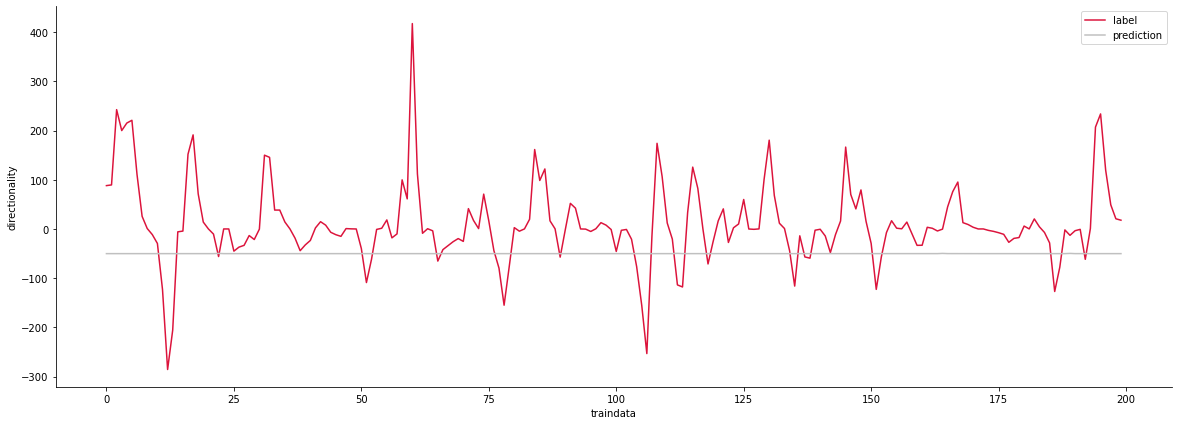

In [7]:
dm = FlyDataModule(cell_line="S2",
                  data_win_radius=5,
                  batch_size=1,
                  label_type="directionality",
                  label_val=10)
dm.setup()
layer_weights = glob.glob("Experiments/Table_9_LSTM_Tunning_Directionality/optuna/version_0/checkpoints/*")[0]
print(layer_weights)
model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
ev.createPlot(model, dm, "train", "idk")

In [6]:
#to csv
import pandas as pd
ar_val   = np.array(vals)
ar_col   = np.expand_dims(np.array(cols),0)
csv_data = np.vstack((ar_col, ar_val))
pd.DataFrame(csv_data).to_csv("Experiments/Table_9_LSTM_Tunning_Directionality/Sup_9_Results.csv")